##Human vs Machine Generated Text prediction

Importing the necessary libraries

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/path/to/dataset/'

data = pd.read_excel(file_path)
data.shape

Mounted at /content/drive


(5000, 4)

In [ ]:
# Drop if any null values in the data set
data = data.dropna()
data.shape

(4741, 4)

In [ ]:
# Fill empty string if there are any null values in the each columns
data['Human'] = data['Human'].fillna(' ')
data['Machine_1'] = data['Machine_1'].fillna(' ')
data['Machine_2'] = data['Machine_2'].fillna(' ')
data['Machine_3'] = data['Machine_3'].fillna(' ')

In [ ]:
# Combine human and machine text into separate lists
human_text = data['Human'].tolist()
machine_text = data['Machine_1'].tolist() + data['Machine_2'].tolist() + data['Machine_3'].tolist()

In [ ]:
text_data = human_text + machine_text

In [ ]:
# Creating labels
human_labels = [0] * len(human_text)
machine_labels = [1] * len(machine_text)
labels = human_labels + machine_labels

In [ ]:
# Basic NLP cleaning
def clean_text(text):
  tokens = nltk.word_tokenize(text)  # Tokenization
  # Removing punctuations
  tokens = [word for word in tokens if word.isalnum()]
  # Removing stop words if any
  stopwords = nltk.corpus.stopwords.words('english')
  tokens = [word for word in tokens if word not in stopwords]
  return ' '.join(tokens)

In [ ]:
text_data = [clean_text(text) for text in text_data]

# Split data for testing and training
X_train, X_test, y_train, y_test = train_test_split(text_data, labels, test_size=0.3, random_state=42)


### Using Support Vector Machine (SVM)


SVM Accuracy: 0.7943760984182777
              precision    recall  f1-score   support

           0       0.68      0.29      0.41      1387
           1       0.81      0.96      0.88      4303

    accuracy                           0.79      5690
   macro avg       0.74      0.63      0.64      5690
weighted avg       0.78      0.79      0.76      5690



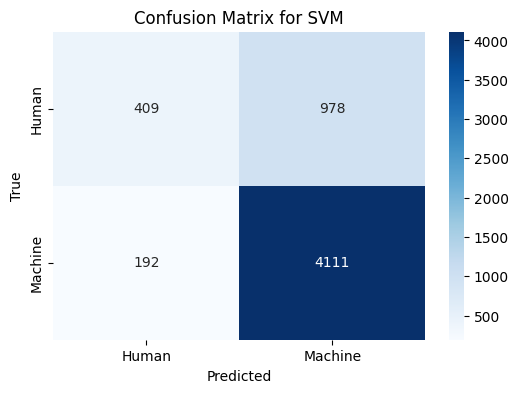

In [ ]:
# Convert text data into numerical representations using vectorizer
# Creating and training the text classification pipeline (SVM)
text_clf_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])
text_clf_svm.fit(X_train, y_train)

# Predictions with SVM
predicted_svm = text_clf_svm.predict(X_test)

# SVM model's performance
accuracy_svm = accuracy_score(y_test, predicted_svm)
print(f"\nSVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, predicted_svm))

# Confusion matrix with labels
cm_svm = confusion_matrix(y_test, predicted_svm, labels=[0, 1])
cm_labels = ['Human', 'Machine']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


### Using Naive Bayes


Naive Bayes Accuracy: 0.7567662565905097
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1387
           1       0.76      1.00      0.86      4303

    accuracy                           0.76      5690
   macro avg       0.88      0.50      0.43      5690
weighted avg       0.82      0.76      0.65      5690



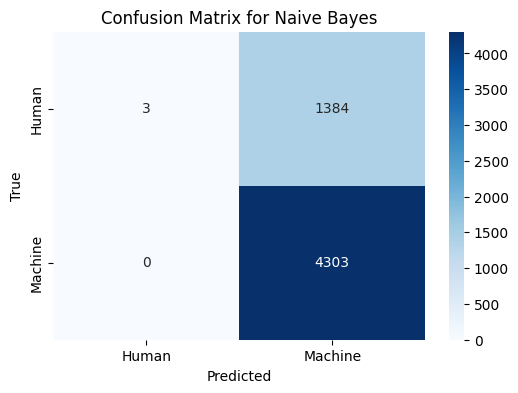

In [ ]:
# Convert text data into numerical representations using vectorizer
# Creating and training the text classification pipeline (Naive Bayes)
text_clf_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
text_clf_nb.fit(X_train, y_train)

# Predictions with Naive Bayes
predicted_nb = text_clf_nb.predict(X_test)

# Naive Bayes model's performance
accuracy_nb = accuracy_score(y_test, predicted_nb)
print(f"\nNaive Bayes Accuracy: {accuracy_nb}")
print(classification_report(y_test, predicted_nb))

# Confusion matrix with labels
cm_nb = confusion_matrix(y_test, predicted_nb, labels=[0, 1])
cm_labels = ['Human', 'Machine']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


### Using Random Forest


Random Forest Accuracy: 0.804920913884007
              precision    recall  f1-score   support

           0       0.81      0.26      0.39      1387
           1       0.80      0.98      0.88      4303

    accuracy                           0.80      5690
   macro avg       0.81      0.62      0.64      5690
weighted avg       0.81      0.80      0.76      5690



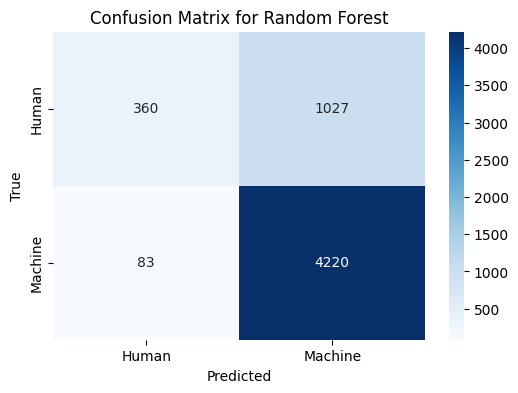

In [ ]:
# Convert text data into numerical representations using vectorizer
# Creating and training the text classification pipeline (Random Forest)
text_clf_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
text_clf_rf.fit(X_train, y_train)

# Predictions with Random Forest
predicted_rf = text_clf_rf.predict(X_test)

# Random Forest model's performance
accuracy_rf = accuracy_score(y_test, predicted_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, predicted_rf))

# Confusion matrix with labels
cm_rf = confusion_matrix(y_test, predicted_rf, labels=[0, 1])
cm_labels = ['Human', 'Machine']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()
